# LG
# Day3 Class : Deep learning applied to audio I (MLP, DNN, SPEECH MNIST, regularization)

# class 3-1 : Logistic Regression from Scratch

--2020-02-17 14:25:42--  https://docs.google.com/uc?export=download&id=1dKopFc2NzjMwHCRK03s8fcySKFW0hGiz
Resolving docs.google.com (docs.google.com)... 74.125.141.139, 74.125.141.100, 74.125.141.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qd5hkgnq138e4iuvo9qd26q8lg16cvd3/1581948900000/00225817656807964639/*/1dKopFc2NzjMwHCRK03s8fcySKFW0hGiz?e=download [following]
--2020-02-17 14:25:42--  https://doc-14-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qd5hkgnq138e4iuvo9qd26q8lg16cvd3/1581948900000/00225817656807964639/*/1dKopFc2NzjMwHCRK03s8fcySKFW0hGiz?e=download
Resolving doc-14-5c-docs.googleusercontent.com (doc-14-5c-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-14-5c-docs.googleusercontent.com (doc-14-5c-do

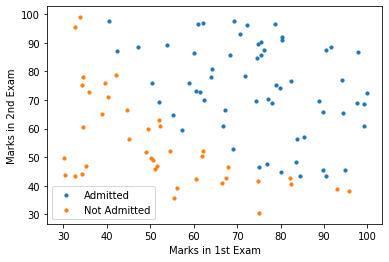

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data download
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dKopFc2NzjMwHCRK03s8fcySKFW0hGiz' -O data_classification.txt
path = './data_classification.txt'

# data load
data = pd.read_csv(path, header=None)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

admitted = data.loc[y == 1]

not_admitted = data.loc[y == 0]

# plots
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [0]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [0]:
# make and fit model

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)


0.88
[-605.23048544    4.76304661    4.73375034]


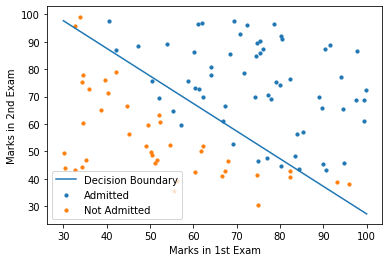

In [4]:
# results

preds = model.predict(X,0.5)
print((preds == y).mean())
print(model.theta)

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()

x_values = [30, 100]
y_values = - (model.theta[0] + np.dot(model.theta[1], x_values)) / model.theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

# class 3-2 : Logistic Regression using scikit-learn

0.89
[[0.20535491 0.2005838 ]]
[-25.05219314]


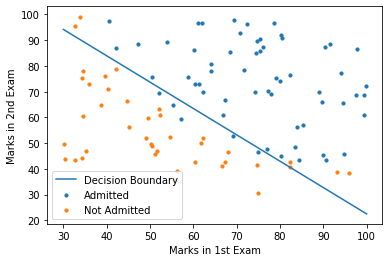

In [5]:
from sklearn.linear_model import LogisticRegression


reg = LogisticRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)




plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()

x_values = [30, 100]
y_values = - (reg.intercept_[0] + np.dot(reg.coef_[0][0], x_values)) / reg.coef_[0][1]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
#plt.ylim([30,100])
plt.legend()
plt.show()


# class 3-3 : Logistic Regression with Speech-mnist

In [0]:
# download speech-mnist audio data
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vD12AFfbA8vrTHeXb1IKk4wKbZwWDARg' -O recordings.zip
!mkdir speech_mnist
!unzip -qq /content/recordings.zip -d ./speech_mnist 

In [7]:
# speech mnist 데이터 살펴보기
import glob
import librosa 
import IPython.display as ipd
import librosa.display

speech_mnist = glob.glob('./speech_mnist/*.wav')
X, fs = librosa.load(speech_mnist[0], sr=None)

print('file name : ' + speech_mnist[0])
print('sampling rate : ' + (str)(fs))
ipd.Audio(X, rate=fs, autoplay=False)

file name : ./speech_mnist/4_jackson_42.wav
sampling rate : 8000


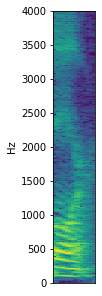

In [8]:
stft = librosa.stft(X, n_fft=1024, hop_length=256, window='hann') #librosa를 이용한 stft
spectrogram, phase = librosa.magphase(stft) # 복소수인 stft에 대해 크기 (magnitude)와 위상(phase)를 분리하는 함수

plt.figure(figsize=(0.75,5))
librosa.display.specshow(np.log(spectrogram + 1e-3), sr=8000, cmap='viridis', x_axis=None, y_axis='linear')
plt.show()

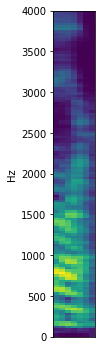

In [9]:
mel = librosa.feature.melspectrogram(X, sr=8000) # audio에서 mel-spectrogram을 추출하는 함수
plt.figure(figsize=(0.75,6))
librosa.display.specshow(np.log(mel + 1e-3), sr=8000,  cmap='viridis', x_axis=None, y_axis='linear')
plt.show()

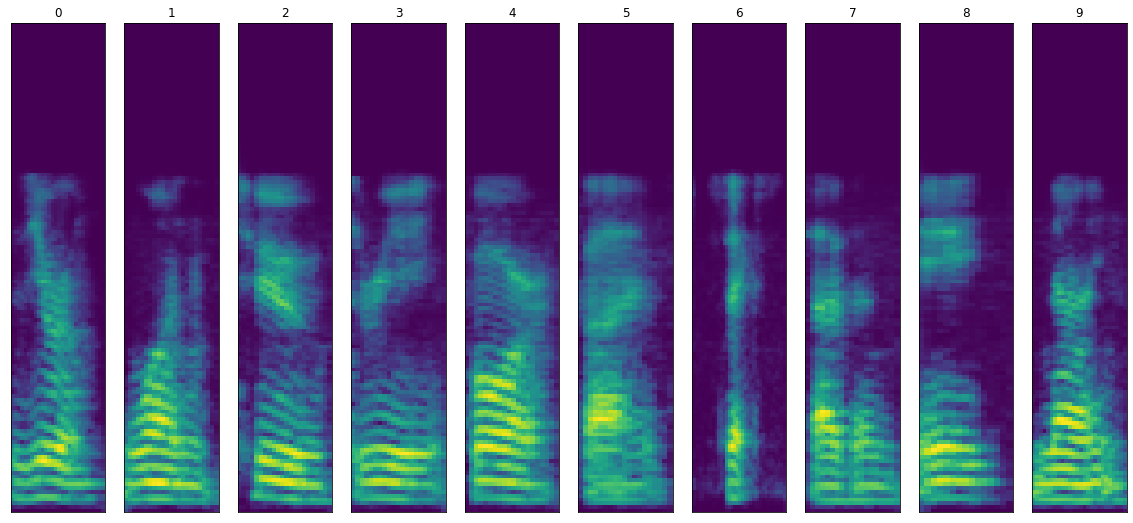

In [10]:
# 각 숫자별 spectrogram 확인
list = []
for i in range(10):
  temp, sr = librosa.load('./speech_mnist/' + (str)(i) + '_jackson_0.wav')
  list.append(temp)

plt.figure(figsize=(20,9))
for index, item in enumerate(list):
  mel = librosa.feature.melspectrogram(item)
  plt.subplot(1,10,index+1)
  plt.gca().set_title(index)
  
  plt.yticks([])
  librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis=None)

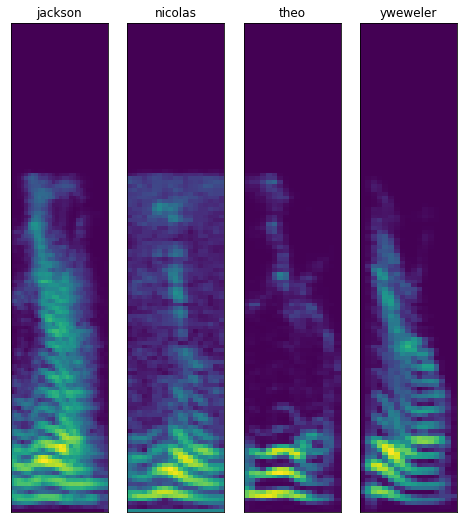

In [11]:
# 각 화자별 spectrogram 확인
list = []
names = ['jackson','nicolas','theo','yweweler']
for name in names:
  temp, sr = librosa.load('./speech_mnist/' + '0_' + name +'_0.wav')
  list.append(temp)

plt.figure(figsize=(8,9))
for index, item in enumerate(list):
  mel = librosa.feature.melspectrogram(item)
  plt.subplot(1,4,index+1)
  plt.gca().set_title(names[index])
  
  plt.yticks([])
  librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis=None)


In [0]:
# download speech-mnist numpy data
# librosa로 읽은 audio를 numpy로 저장해둔 형태입니다. 데이터 로드에 따르는 시간을 절약하기 위해 다운로드 받습니다.
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
!unzip -qq /content/recordings_npy.zip -d ./speech_mnist 

In [13]:
speech_mnist_data = []
speech_mnist_target = []


# preprocessing for all audio (extract mel-spectrogram)
speech_mnist = glob.glob('./speech_mnist/*.npy')
for item in speech_mnist:
  target, speaker, index = item.split('/')[-1].split('.npy')[0].split('_')
  
  wavs = np.load(item)
  mel = librosa.feature.melspectrogram(wavs, sr=8000, n_mels=80)
  
  speech_mnist_data.append(mel)
  speech_mnist_target.append(target)

# 모든 mel-spectrogram의 데이터 길이 (시간)을 확인합니다. 가장 긴 mel-spec에 맞춰 나머지 mel을 zero-padding 해주기 위함입니다.
data_length = []
for item in speech_mnist_data:
  data_length.append(np.shape(item)[1])


print('max length : ' + (str)(np.max(data_length)))

max length : 36


In [14]:
# zero-pad all mel to max length
def pad(mel, max_length):
  if np.shape(mel)[1] > max_length:
    return mel[:,:max_length]
  else:
    return np.concatenate((mel, np.zeros((80, max_length-np.shape(mel)[1]))), axis=1)

max_length = np.max(data_length)
speech_mnist_data_pad = []
for item in speech_mnist_data:
  speech_mnist_data_pad.append(pad(item, max_length))


speech_mnist_data_final = np.reshape(speech_mnist_data_pad, (np.shape(speech_mnist_data_pad)[0],-1))
print('shape of training data : ' + (str)(np.shape(speech_mnist_data_pad)))
print('shape of training data (flatten) : ' + (str)(np.shape(speech_mnist_data_final)))
print('shape of target data : ' + (str)(np.shape(speech_mnist_target)))

shape of training data : (2000, 80, 36)
shape of training data (flatten) : (2000, 2880)
shape of target data : (2000,)


In [15]:
# 전처리된 speech mnist 데이터로 logistic regression 분석
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(speech_mnist_data_final, speech_mnist_target, test_size=0.25, random_state=0)


from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

score is : 0.628


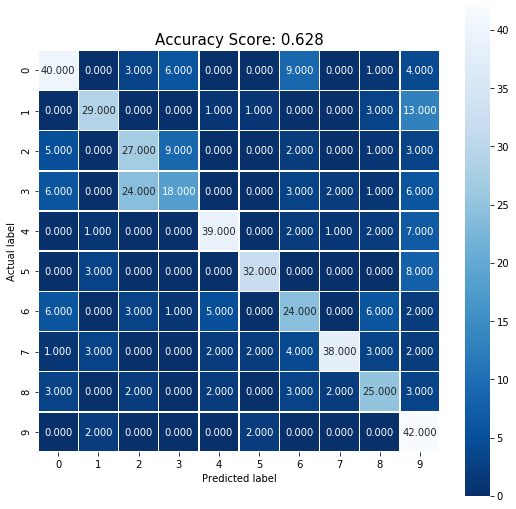

In [16]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print('score is : ' + (str)(score))



# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

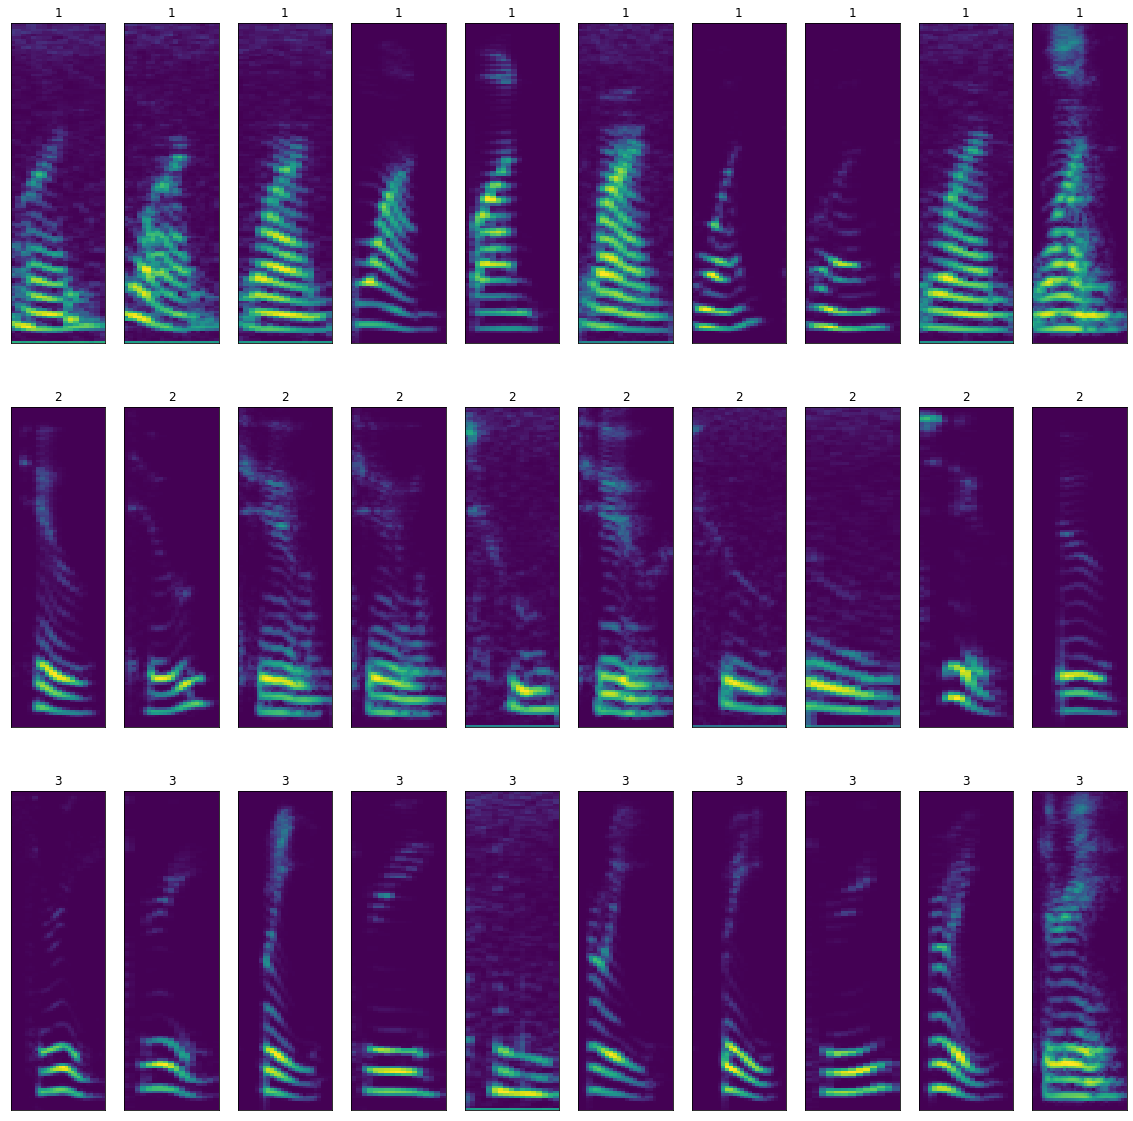

In [17]:
# 자주 틀린 2와 3의 차이를 스펙트로그램을 통해 확인합니다.
sample_nums = 10

one = np.random.choice(glob.glob('./speech_mnist/1*.npy'), sample_nums)
two = np.random.choice(glob.glob('./speech_mnist/2*.npy'), sample_nums)
three = np.random.choice(glob.glob('./speech_mnist/3*.npy'), sample_nums)


plt.figure(figsize=(20,20))
for i in range(sample_nums):
  plt.subplot(3,sample_nums,i+1)
  mel_1 = librosa.feature.melspectrogram(np.load(one[i]),sr=8000, n_fft=512, hop_length=128)
  librosa.display.specshow(np.log(mel_1+1e-3),cmap='viridis', x_axis=None)
  plt.title('1')
  plt.subplot(3,sample_nums,i+1+sample_nums)
  mel_2 = librosa.feature.melspectrogram(np.load(two[i]),sr=8000, n_fft=512, hop_length=128)
  librosa.display.specshow(np.log(mel_2+1e-3),cmap='viridis', x_axis=None)
  plt.title('2')
  plt.subplot(3,sample_nums,i+1+2*sample_nums)
  mel_3 = librosa.feature.melspectrogram(np.load(three[i]),sr=8000, n_fft=512, hop_length=128)
  librosa.display.specshow(np.log(mel_3+1e-3),cmap='viridis', x_axis=None)
  plt.title('3')




# class 3-4 : Single Layer Perceptron from Scratch

Class to create a single layer perceptron

In [0]:
import numpy as np
from numpy import exp, array, random, dot, tanh
  
def sigmoid(x):
  return 1 / (1 +np.exp(-x + 0.0001))

class Network():
    def __init__(self):
      self.w = 2 * random.random((3, 1)) - 1  # 3x1 Weight matrix 
    
    def activation(self,x):
      return sigmoid(x)

    def activation_derivative(self, x):
      return sigmoid(x)*(1-sigmoid(x))

    def forward_propagation(self, x):
        return self.activation(dot(x, self.w))

    # training the network. 
    def train(self, x, y, num_train_iterations,lr):
                                  
        for iteration in range(num_train_iterations): 
            a = self.forward_propagation(x)
            dz = a-y
            dw = dot(x.T, dz * self.activation_derivative(a))
            self.w = self.w - lr*dw


make simple training data

In [0]:
train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
train_outputs = array([[0, 1, 1, 0]]).T

define and train the model

In [20]:
network = Network() 
print ('Random weights at the start of training') 
print (network.w)

network.train(train_inputs, train_outputs, 10000,0.1)

print ('New weights after training')
print (network.w)

Random weights at the start of training
[[0.66580854]
 [0.764559  ]
 [0.90966859]]
New weights after training
[[10.40138959]
 [-0.41107029]
 [-4.91009045]]


test the neural network with a new input.


In [21]:
print ("Testing network on new examples ->")
print (network.forward_propagation(array([1, 0, 0])))

Testing network on new examples ->
[0.99996961]


# class 3-5 : Neural Network with One Hidden Layer from Scratch

Class to create a neural network with one hidden layer

In [0]:
import numpy as np
  
def sigmoid(x):
  return 1 / (1 +np.exp(-x))

class NeuralNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.w = [] # weights
        self.b = [] # biases
        # initialize weights and bias with random value
        np.random.seed(1)
        for i in range(len(layers)-1):
            self.w.append(np.random.randn(layers[i+1], layers[i]))
            self.b.append(np.random.randn(layers[i+1], 1))

    def activation(self,x):
      return sigmoid(x)

    def activation_derivative(self, x):
      return sigmoid(x)*(1-sigmoid(x))

    def forward_propagation(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = [] # feedforward before activaiton
        a_s = [a] # feedforward after activaiton
        for i in range(len(self.w)):
            z_s.append(self.w[i].dot(a) + self.b[i])
            a = self.activation(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)

    def backpropagation(self,y, z_s, a_s):
        dw = [] # derivitives respect to biases
        db = [] # derivitives respect to weight
        dz = [None] * len(self.w) # deltas

        # insert the last layer error
        dz[-1] = (y-a_s[-1])*(self.activation_derivative(z_s[-1]))

        # Perform BackPropagation
        for i in reversed(range(len(dz)-1)):
            da = self.w[i+1].T.dot(dz[i+1])
            dz[i] = da*self.activation_derivative(z_s[i])
        
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in dz]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(dz)]
        return dw, db


    def train(self, x, y, batch_size, epochs, lr):
        for e in range(epochs):
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.forward_propagation(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.w = [w+lr*dweight for w,dweight in  zip(self.w, dw)]
                self.b = [w+lr*dbias for w,dbias in  zip(self.b, db)]
                if e % 100 == 0:
                  print("epoch : " + str(e))
                  print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch)))


define the network

In [0]:
nn = NeuralNetwork([1, 200, 1])
X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
y = 0.5*(1+np.sin(X))

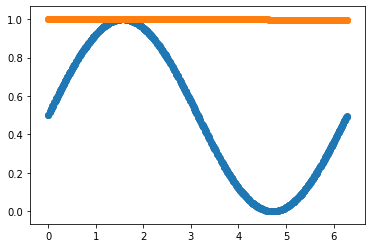

In [24]:
# 초기화된 network를 훈련 전에 X입력을 넣으면 출력되는 결과를 확인
_, a_init = nn.forward_propagation(X)
plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_init[-1].flatten())
plt.show()

train the network

In [25]:
nn.train(X, y, epochs=200, batch_size=64, lr = 0.1)

epoch : 0
loss = 19.242077285427523
epoch : 100
loss = 5.378472883494013


plot raw results

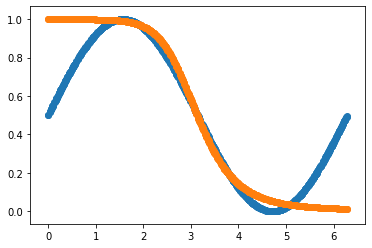

In [26]:
import matplotlib.pyplot as plt

_, a_s = nn.forward_propagation(X)

plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_s[-1].flatten())
plt.show()

# class 3-6 : Multi Layer Deep Neural Network using Keras

import keras and get mnist data

In [27]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


show mnist data

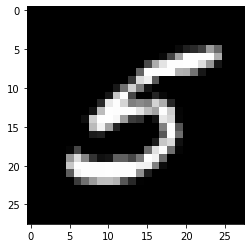

5


In [28]:
import numpy as np
from matplotlib import pyplot as plt

i = 1039

image = X_train[i]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(Y_train[i])

preprocess mnist data

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

setup model parametes

In [0]:
input_size = 784
batch_size = 100    
hidden_neurons = 400
epochs = 10

build a dnn model (with three dense layers)

In [31]:
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')

train the dnn model

In [32]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 12s 203us/step - loss: 0.3230 - acc: 0.9055
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1243 - acc: 0.9634
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0850 - acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0641 - acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0494 - acc: 0.9852
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0392 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0312 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0246 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0194 - acc: 0.9

evaluate the model with test data

In [33]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

10000/10000 [==============================] - 0s 42us/step

Test accuracy: 0.9819


print confusion matrix

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 969    0    1    0    0    2    4    1    2    1]
 [   0 1125    2    2    0    0    2    1    3    0]
 [   4    5  999    8    2    1    2    5    6    0]
 [   0    0    1  997    0    3    0    2    2    5]
 [   1    0    2    1  965    0    3    1    0    9]
 [   2    1    0    6    1  876    3    0    1    2]
 [   1    2    0    1    3    4  946    0    1    0]
 [   1    3    5    1    1    0    0 1008    2    7]
 [   2    0    2    6    3    6    2    3  945    5]
 [   0    2    0    3    7    3    2    3    0  989]]


# class 3-7 : Multi Layer Deep Neural Network with Speech mnist

In [0]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(speech_mnist_data_final, speech_mnist_target, test_size=0.25, random_state=0)

# X_train /= np.max(X_train)
# X_test /= np.max(X_test)

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [0]:
input_size = 2880
batch_size = 500    
hidden_neurons = 400
epochs = 500

In [0]:
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam')

In [38]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/500
1500/1500 [==============================] - 0s 183us/step - loss: 2.8941 - acc: 0.1467
Epoch 2/500
1500/1500 [==============================] - 0s 23us/step - loss: 2.1431 - acc: 0.2380
Epoch 3/500
1500/1500 [==============================] - 0s 20us/step - loss: 1.9550 - acc: 0.2860
Epoch 4/500
1500/1500 [==============================] - 0s 20us/step - loss: 1.8574 - acc: 0.3367
Epoch 5/500
1500/1500 [==============================] - 0s 21us/step - loss: 1.7669 - acc: 0.3800
Epoch 6/500
1500/1500 [==============================] - 0s 18us/step - loss: 1.6854 - acc: 0.4093
Epoch 7/500
1500/1500 [==============================] - 0s 19us/step - loss: 1.6155 - acc: 0.4480
Epoch 8/500
1500/1500 [==============================] - 0s 20us/step - loss: 1.5615 - acc: 0.5013
Epoch 9/500
1500/1500 [==============================] - 0s 21us/step - loss: 1.5139 - acc: 0.5180
Epoch 10/500
1500/1500 [==============================] - 0s 20us/step - loss: 1.4698 - acc: 0.5400
Epoch 11

In [39]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

500/500 [==============================] - 0s 164us/step

Test accuracy: 0.8800000004768371


# class 3-8 : musical genre classification

음악 장르 분류 모델 설계. 학습 데이터셋에는 jazz, classical, country, disco 등 10가지 장르에 해당하는 30초 길이의 음원이 있습니다.

In [40]:
# GTZAN 데이터셋 다운로드
#audio
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1MVa2cmIdhm2vanrJwdWQQPR9qJDf0iSp' -O gtzan_wav.zip
!mkdir GTZAN
!unzip -qq /content/gtzan_wav.zip -d ./GTZAN 

# #preprocessed feature
# !wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
# !mkdir GTZAN
# !unzip -qq /content/recordings_npy.zip -d ./GTZAN 

warning [/content/gtzan_wav.zip]:  402701 extra bytes at beginning or within zipfile
  (attempting to process anyway)


In [41]:
# GTZAN 데이터셋 살펴보기
import librosa
import IPython.display as ipd
# wav_path = './GTZAN/wav/'
# audio_path = 'pop/pop_00019.wav'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

selected_genre = genres[0]

random_sample_path = np.random.choice(glob.glob('./GTZAN/wav/' + selected_genre + '/*.wav' ),1)
audio, sr = librosa.load(random_sample_path[0], 16000)
print(selected_genre + ' audio')
ipd.Audio(audio, rate=sr, autoplay=False)


blues audio


In [42]:
# 장르 내 곡 사이의 차이를 확인하자.

# 시간 절약을 위해 wav --> numpy 변환된 데이터 다운로드
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1oSTpRRa-ZSaaJjdv9s27AwC2Zo7_qEou' -O gtzan_npy.zip
!unzip -qq /content/gtzan_npy.zip -d ./GTZAN 

warning [/content/gtzan_npy.zip]:  402701 extra bytes at beginning or within zipfile
  (attempting to process anyway)


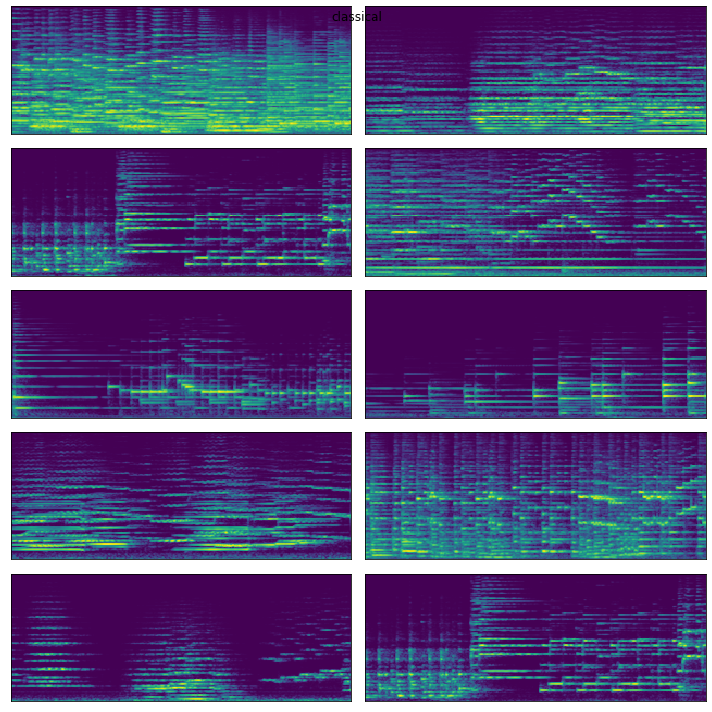

In [43]:

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
selected_genre = 'classical'

plt.figure(figsize=(10,10))
plt.suptitle(selected_genre)
audio_list = np.random.choice(glob.glob('./GTZAN/npy/' + selected_genre + '/*.npy'), 10)

for index, item in enumerate(audio_list):
  mel = librosa.feature.melspectrogram(np.load(item)[:10*16000])
  plt.subplot(5,2,index+1)
  librosa.display.specshow(np.log(mel+1e-3), cmap='viridis', x_axis=None)

plt.tight_layout()


In [44]:
np.random.choice(glob.glob('./GTZAN/npy/' + genre + '/*.npy'), 1)[0]

NameError: ignored

In [0]:
# 장르별 spectrogram 비교
list = []
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
for genre in genres:
  temp = np.load(np.random.choice(glob.glob('./GTZAN/npy/' + genre + '/*.npy'), 1)[0])
  list.append(temp)

plt.figure(figsize=(15,15))
for index, item in enumerate(list):
  mel = librosa.feature.melspectrogram(item[:15*16000])
  plt.subplot(5,2,index+1)
  plt.gca().set_title(genres[index])
  plt.xticks([])
  plt.yticks([])
  librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis=None)

In [0]:
# 학습 데이터 전처리


path = './GTZAN/npy/*/*.npy'
audio_files = sorted(glob.glob(path))
len(audio_files)


In [0]:
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

audio_data = []
class_label = []

for item in audio_files:
  audio = np.load(item)
  audio_data.append(audio)
  label = item.split('/')[-1].split('_')[0]
  class_label.append(genres.index(label))

In [0]:
len(class_label)

In [0]:
label_all = []
for item in class_label:
	label_all.append(np.eye(10)[item])

In [0]:
Wav_all = np.asarray(audio_data)
label_all = np.asarray(label_all)
from sklearn.model_selection import train_test_split
Wav_train, Wav_test, label_train, label_test = train_test_split(Wav_all, label_all, test_size=0.1, random_state=123, stratify=label_all)


In [0]:
# 마지막 전처리 과정입니다. 시간 관계 상 실행은 생략합니다.
# Wav_all = []
# X_train = []
# y_train = []

# for wav,label in zip(Wav_train, label_train):
#   mel = librosa.feature.melspectrogram(wav,sr=16000,n_fft=512,hop_length=375,n_mels=96)
#   log_mel = np.log(mel+1e-3)
#   X_train.append(np.expand_dims((log_mel),axis=-1))
#   y_train.append(label)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

# X_test = []
# y_test = []

# for wav,label in zip(Wav_test, label_test):
#   mel = librosa.feature.melspectrogram(wav,sr=16000,n_fft=512,hop_length=375,n_mels=96)
#   log_mel = np.log(mel+1e-3)
#   X_test.append(np.expand_dims((log_mel),axis=-1))
#   y_test.append(label)

# X_test = np.asarray(X_test)
# y_test = np.asarray(y_test)

!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1NJ9PlTm8ab6QoN1SjDarW5Mud4Zsp0IA' -O gtzan_processed_features.zip
!unzip -qq /content/gtzan_processed_features.zip -d ./GTZAN 

In [0]:
Wav_all = []
Wav_train = []
Wav_test = []
Label_train = []
label_test = []

X_train = np.load('./GTZAN/preprocessed_features/GTZAN_train_features.npy')
y_train = np.load('./GTZAN/preprocessed_features/GTZAN_train_labels.npy')
X_test = np.load('./GTZAN/preprocessed_features/GTZAN_test_features.npy')
y_test = np.load('./GTZAN/preprocessed_features/GTZAN_test_labels.npy')
print("Train set size", X_train.shape[0])
print("Test set size", X_test.shape[0])

In [0]:
# 이제 학습 데이터 준비까지 끝났다. 학습을 위해, 모델을 설계해보자. 

from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(96,1280,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
          
model.add(pooling.MaxPooling2D(pool_size=(4,5)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(3,4)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,4)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(2,4)))

model.add(pooling.AveragePooling2D(pool_size=(2,4)))

model.add(Flatten())
 
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


In [0]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자.
opt = Adam(lr=0.0002)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
# Validation accuracy가 가장 높을 때 네트워크를 저장하자.
checkpoint = ModelCheckpoint('best.h5', verbose=0, monitor='val_acc',save_best_only=True, mode='auto')

In [0]:
model.summary()

In [0]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32, nb_epoch=10, verbose=1, callbacks=[checkpoint])

In [0]:
# 학습된 모델에, test set을 넣어서 실제 성능을 확인해보자.
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", score[1])

In [0]:
model = load_model('best.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print("Best Model Test Accuracy:", score[1])

In [0]:
# confusion matrix를 그려보자.
# 즉, test set에 있는 입력들에 대해, 실제 정답과 예측한 정답 사이의 관계를 나타낸 표를 그려보자.
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'], rotation=45)
plt.yticks(tick_marks, ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


In [0]:
# 실제로 중간에 얻어진 feature가 같은 class에 대해서 서로 유사한 값을 갖는지 확인하기 위해, 고차원 데이터를 2차원 데이터로 맵핑하는 TSNE 예시를 보자.
# 우선, 우리가 설계한 모델에서 모든 레이어의 출력을 확인할 수 있는 코드를 작성하자.

model_embedding = Model(inputs=[model.input], outputs=[model.layers[-3].output])
temp = model_embedding.predict(X_train)

In [0]:
# 해당 출력값 temp에 대해, TSNE를 적용하자.
# 즉, 128차원 벡터들을, 2차원 평면으로 차원 축소를 한다. 이 때, 128차원 공간상에서 가깝던 것들이 2차원에서도 여전히 가깝게 유지되도록 기준을 정한채 차원을 축소한다. 

from sklearn.manifold import TSNE
X = temp

X_embedded = TSNE(n_components=2,random_state=100).fit_transform(X)

In [0]:
# 그리고 나서, 각 벡터들을 2차원 평면상에 클래스에 따라 그려보면 다음과 같다. 

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
numbers = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

plt.figure(figsize=(10,10))
plt.clf()
y_gt = np.argmax(y_train,axis=1)
for i in range(10):
	index = np.where(y_gt==i)[0]
	plt.scatter(X_embedded[index][:,0], X_embedded[index][:,1], c = colors[i], label=numbers[i])


plt.legend(bbox_to_anchor=(1,0.88))
plt.show()

In [0]:
# 마지막으로 훈련 중 loss와 accuracy의 변화를 그래프로 살펴보자.

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t")
plt.plot(hist.history['val_loss'], 'r:', label="v")
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("acc")

plt.plot(hist.history['acc'], 'b-', label="t")
plt.plot(hist.history['val_acc'], 'r:', label="v")
plt.legend()
plt.tight_layout()
plt.show()